In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
import os

import excursion
import excursion.testcases.fast as scandetails
import excursion.optimize
import numpy as np
import datetime

import excursion.plotting.twodim as plots
import excursion.utils as utils

np.warnings.filterwarnings('ignore')


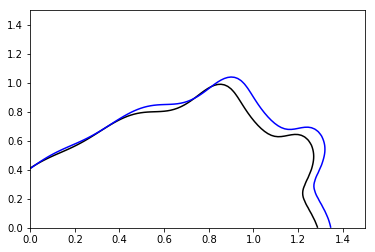

In [21]:

grid = ix,iy = scandetails.plotG
X = excursion.utils.mesh2points(grid,scandetails.plot_rangedef[:,2])

functions = [
    scandetails.truth,
    lambda X: scandetails.truth(X-0.05)
]


scandetails.truth_functions = functions


truthv = excursion.utils.values2mesh(
    scandetails.truth(X),
    scandetails.plot_rangedef,
    scandetails.invalid_region
)

contours = []
for truth_func in scandetails.truth_functions:
    contours.append(
        excursion.utils.values2mesh(
            truth_func(X),
            scandetails.plot_rangedef,
            scandetails.invalid_region
        )
    )


for cont,c in zip(contours, ['k','b']):
    plt.contour(ix,iy,cont, levels = [0], colors=[c])

In [34]:
#initialize it...
N_INIT  = 5
N_FUNCS = 2

np.random.seed(1)
X = np.random.uniform(scandetails.plot_rangedef[:,0],scandetails.plot_rangedef[:,1], size = (N_INIT,2))
y_list = [np.array([scandetails.truth_functions[i](np.asarray([x]))[0] for x in X]) for i in range(N_FUNCS)]

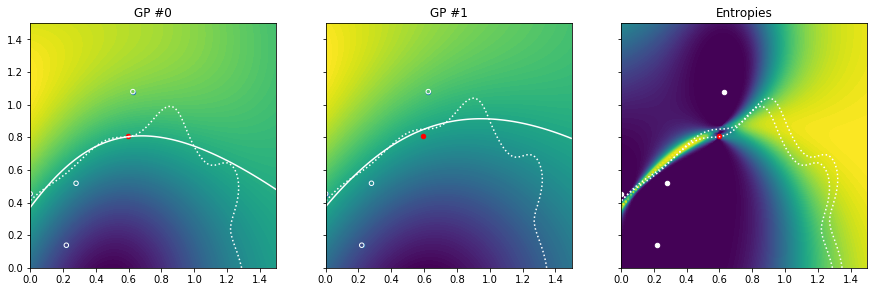

In [35]:
gps = [excursion.get_gp(X,y_list[i]) for i in range(N_FUNCS)]
fig, axarr = plt.subplots(1, 3, sharey=True)
fig.set_size_inches(15, 4.5)
plots.plot(axarr,gps,X,y_list,scandetails)
# plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))))
plt.show()

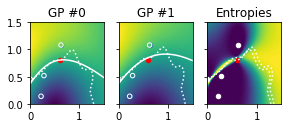

taking new x. best non-existent index 0 [1.1625 0.8625]
new x: [1.1625 0.8625]
new y i: 0 1.690264607289616
new y i: 1 1.617973722142597


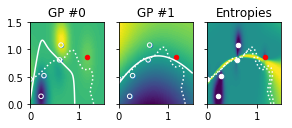

taking new x. best non-existent index 0 [1.35  0.525]
new x: [1.35  0.525]
new y i: 0 2.0665786738287433
new y i: 1 0.6553082265833616


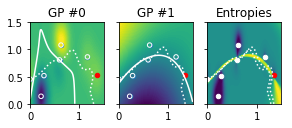

taking new x. best non-existent index 0 [1.3875 0.2625]
new x: [1.3875 0.2625]
new y i: 0 3.8363073019117966
new y i: 1 2.3912878900409535


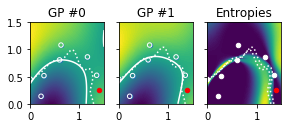

taking new x. best non-existent index 0 [1.125  0.7125]
new x: [1.125  0.7125]
new y i: 0 0.7629367770469178
new y i: 1 0.2011542647726099


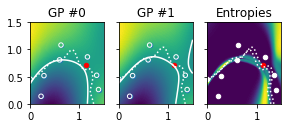

taking new x. best non-existent index 0 [1.3125 1.0125]
new x: [1.3125 1.0125]
new y i: 0 2.8396446843509118
new y i: 1 2.041845748342252


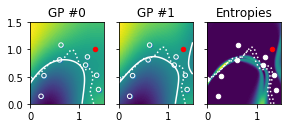

taking new x. best non-existent index 0 [1.125  0.1875]
new x: [1.125  0.1875]
new y i: 0 -0.2902667686334808
new y i: 1 -0.7906698590567536


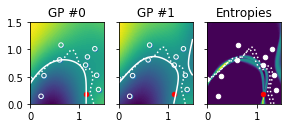

taking new x. best non-existent index 0 [1.1625 0.6375]
new x: [1.1625 0.6375]
new y i: 0 -0.018028606631251165
new y i: 1 -0.31162582468256605


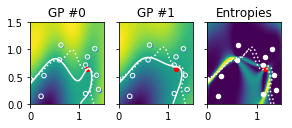

taking new x. best non-existent index 0 [0.9375 0.3   ]
new x: [0.9375 0.3   ]
new y i: 0 -3.9195006672839274
new y i: 1 -5.532199094177184


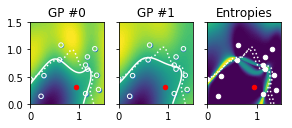

taking new x. best non-existent index 0 [0.2625 1.1625]
new x: [0.2625 1.1625]
new y i: 0 8.981645610444648
new y i: 1 8.98283564088474


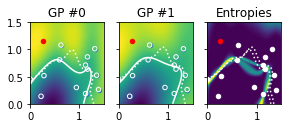

taking new x. best non-existent index 0 [0.8625 0.75  ]
new x: [0.8625 0.75  ]
new y i: 0 -2.8536814408750026
new y i: 1 -3.9450402328034033


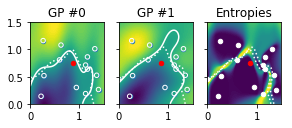

taking new x. best non-existent index 0 [1.05   1.2375]
new x: [1.05   1.2375]
new y i: 0 4.387160709889449
new y i: 1 3.570101302550823


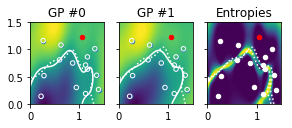

taking new x. best non-existent index 0 [1.2375 0.3   ]
new x: [1.2375 0.3   ]
new y i: 0 0.06419635022487746
new y i: 1 -0.16672532461704836


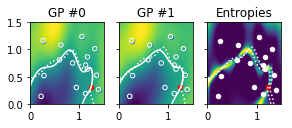

taking new x. best non-existent index 0 [0.4125 0.675 ]
new x: [0.4125 0.675 ]
new y i: 0 -2.7741530559519987
new y i: 1 -3.2381080886117055


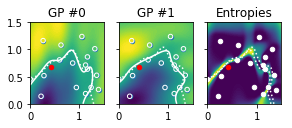

taking new x. best non-existent index 0 [0.8625 1.35  ]
new x: [0.8625 1.35  ]
new y i: 0 6.434178911308766
new y i: 1 6.123106992895066


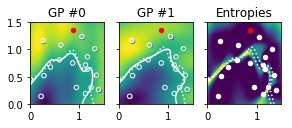

taking new x. best non-existent index 0 [1.425  1.3875]
new x: [1.425  1.3875]
new y i: 0 6.654110469150359
new y i: 1 5.689315134539437


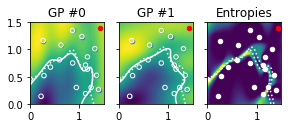

taking new x. best non-existent index 0 [0.975  0.9375]
new x: [0.975  0.9375]
new y i: 0 1.1157429213957952
new y i: 1 -0.20054664244117193


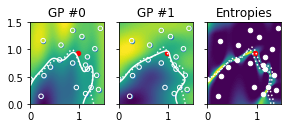

taking new x. best non-existent index 0 [0.075 1.425]
new x: [0.075 1.425]
new y i: 0 8.987196729476274
new y i: 1 8.987196770140105


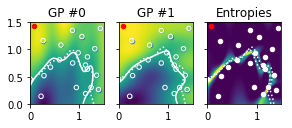

taking new x. best non-existent index 0 [0.1875 0.6   ]
new x: [0.1875 0.6   ]
new y i: 0 1.880166618345387
new y i: 1 1.2845832505223735


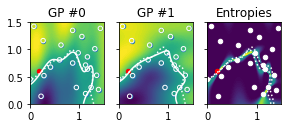

taking new x. best non-existent index 0 [1.1625 0.075 ]
new x: [1.1625 0.075 ]
new y i: 0 -0.8597334479115224
new y i: 1 -1.275757661917798


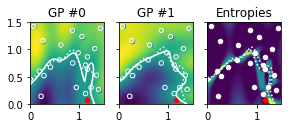

taking new x. best non-existent index 0 [1.2375 0.0375]
new x: [1.2375 0.0375]
new y i: 0 -0.7161224980830969
new y i: 1 -1.3784918165249964


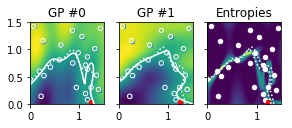

taking new x. best non-existent index 0 [1.0125 0.7125]
new x: [1.0125 0.7125]
new y i: 0 -0.07747851506267223
new y i: 1 -1.829269242578099


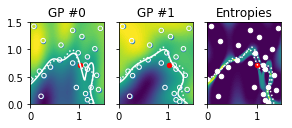

taking new x. best non-existent index 0 [1.2375 0.7125]
new x: [1.2375 0.7125]
new y i: 0 0.7693654002350061
new y i: 1 0.15502979715770415


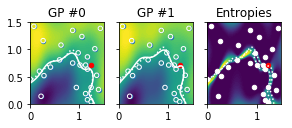

taking new x. best non-existent index 0 [0.7875 0.9375]
new x: [0.7875 0.9375]
new y i: 0 -0.20870879712762402
new y i: 1 -0.13130199087288874


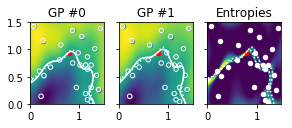

taking new x. best non-existent index 0 [0.4125 0.75  ]
new x: [0.4125 0.75  ]
new y i: 0 -0.15152066431116484
new y i: 1 -0.5023466911327374


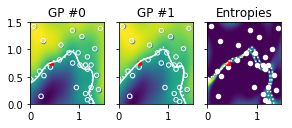

taking new x. best non-existent index 0 [1.275  0.4875]
new x: [1.275  0.4875]
new y i: 0 0.08659931520109554
new y i: 1 -0.5287247389055798


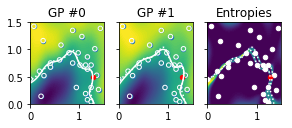

taking new x. best non-existent index 0 [0.0375 0.4125]
new x: [0.0375 0.4125]
new y i: 0 -1.5463417894632814
new y i: 1 -1.7136447543071194


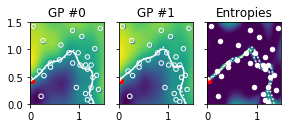

taking new x. best non-existent index 0 [0.675  0.0375]
new x: [0.675  0.0375]
new y i: 0 -9.106324361457123
new y i: 1 -10.252506081685974


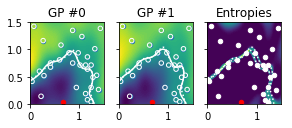

taking new x. best non-existent index 0 [0.45   1.4625]
new x: [0.45   1.4625]
new y i: 0 8.9857615715617
new y i: 1 8.986053825821312


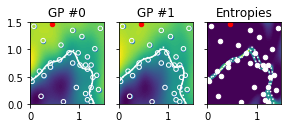

taking new x. best non-existent index 0 [0.3   0.675]
new x: [0.3   0.675]
new y i: 0 0.8595589089027964
new y i: 1 0.7742313782012307


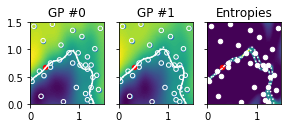

taking new x. best non-existent index 0 [1.3875 0.0375]
new x: [1.3875 0.0375]
new y i: 0 3.16634762053602
new y i: 1 1.353940814120492


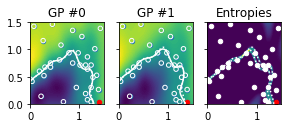

taking new x. best non-existent index 0 [1.2375 1.3875]
new x: [1.2375 1.3875]
new y i: 0 4.896789531636998
new y i: 1 4.585562382312101


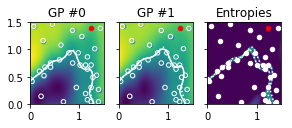

taking new x. best non-existent index 0 [0.8625 0.975 ]
new x: [0.8625 0.975 ]
new y i: 0 -0.14782946258853524
new y i: 1 -0.630188234469045


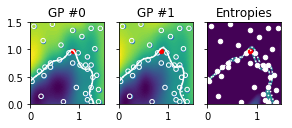

taking new x. best non-existent index 0 [1.05  0.075]
new x: [1.05  0.075]
new y i: 0 -1.5515185683506507
new y i: 1 -3.1159590918549624


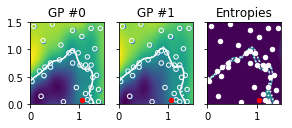

taking new x. best non-existent index 0 [1.275  0.1125]
new x: [1.275  0.1125]
new y i: 0 0.3884677709610975
new y i: 1 -0.687795405262503


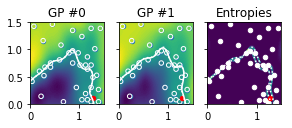

taking new x. best non-existent index 0 [1.05  0.675]
new x: [1.05  0.675]
new y i: 0 0.10245227489383701
new y i: 1 -1.2896323678864783


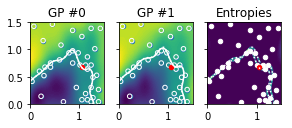

taking new x. best non-existent index 0 [0.075  0.4875]
new x: [0.075  0.4875]
new y i: 0 0.4888379717611975
new y i: 1 0.10169731186396636


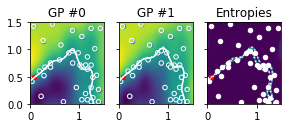

taking new x. best non-existent index 0 [1.3125 0.3375]
new x: [1.3125 0.3375]
new y i: 0 1.4367104382642486
new y i: 1 0.4575540579635251


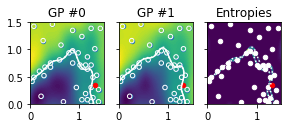

taking new x. best non-existent index 0 [1.35   0.5625]
new x: [1.35   0.5625]
new y i: 0 2.1559446251035275
new y i: 1 0.6523600787085528


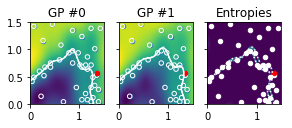

taking new x. best non-existent index 0 [0.9    1.0125]
new x: [0.9    1.0125]
new y i: 0 0.4996606721722898
new y i: 1 -0.3110589519323801


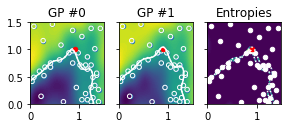

taking new x. best non-existent index 0 [0.4875 0.7875]
new x: [0.4875 0.7875]
new y i: 0 -0.11722047654347056
new y i: 1 -1.107407457220667


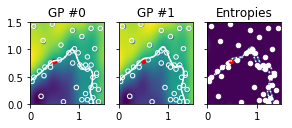

taking new x. best non-existent index 0 [0.0375 1.0875]
new x: [0.0375 1.0875]
new y i: 0 8.987143155028052
new y i: 1 8.987160506892263


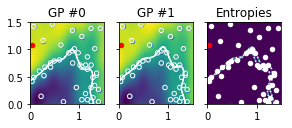

taking new x. best non-existent index 0 [1.2375 0.15  ]
new x: [1.2375 0.15  ]
new y i: 0 -0.04198735474472848
new y i: 1 -0.6581887107802911


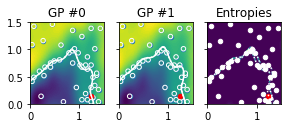

taking new x. best non-existent index 0 [0.7125 0.8625]
new x: [0.7125 0.8625]
new y i: 0 -0.09879363357763316
new y i: 1 -0.28028181615894887


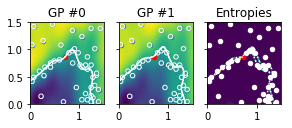

taking new x. best non-existent index 0 [1.35 0.  ]
new x: [1.35 0.  ]
new y i: 0 1.812221287303331
new y i: 1 0.0844131879098935


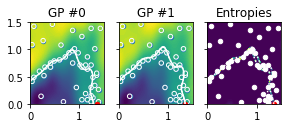

taking new x. best non-existent index 0 [0.1875 0.525 ]
new x: [0.1875 0.525 ]
new y i: 0 -1.177421879734894
new y i: 1 -1.847711428297588


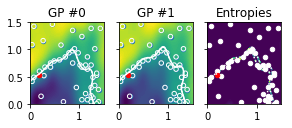

taking new x. best non-existent index 0 [1.4625 0.975 ]
new x: [1.4625 0.975 ]
new y i: 0 5.793275823050089
new y i: 1 5.175463580490883


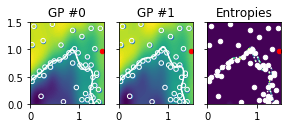

taking new x. best non-existent index 0 [0.45   0.0375]
new x: [0.45   0.0375]
new y i: 0 -14.611999603620117
new y i: 1 -16.106730971531604


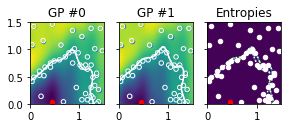

taking new x. best non-existent index 0 [1.275  0.2625]
new x: [1.275  0.2625]
new y i: 0 0.7428316931525032
new y i: 1 0.012388740010186083


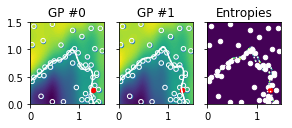

taking new x. best non-existent index 0 [1.3125 0.6   ]
new x: [1.3125 0.6   ]
new y i: 0 1.2677072575167325
new y i: 1 -0.03974687855393899


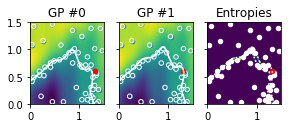

taking new x. best non-existent index 0 [0. 0.]
new x: [0. 0.]
new y i: 0 -17.00890745524945
new y i: 1 -17.826499603449697


In [36]:
N_UPDATES = 50

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
for index in range(N_UPDATES):
    gps = [excursion.get_gp(X,y_list[i]) for i in range(N_FUNCS)]

    fig, axarr = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(4.5, 1.5)
    plots.plot(axarr,gps,X,y_list,scandetails)
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))))
    plt.show()

    newx, acqvals = excursion.optimize.gridsearch(gps, X, scandetails)

    print('new x: {}'.format(newx))
    newy_list = [scandetails.truth_functions[i](np.asarray([newx]))[0] for i in range(N_FUNCS)]
    for i,newy in enumerate(newy_list):
        print('new y i: {} {}'.format(i,newy))
        y_list[i] = np.concatenate([y_list[i],[newy]])
    X = np.concatenate([X,np.array([newx])])